# SAPSO library - a demonstration

This library allows to easily run SA and PSO experiments while providing convenient 2D plotting functions.
Cells below demonstrate a possible workflow.

In [1]:
import numpy as np

import sapso

from sapso.sa import SimulatedAnnealing
from sapso.pso import ParticleSwarmOptimization
from sapso.plot import contour_plot
from sapso.test import Ackley, Sphere, Beale, Himmelblau, Eggholder

## Demo: Simulated Annealing

In [2]:
# select 2D test function
tfunc_sa = Ackley()

# default params
kwargs_sa = {
    'iterations'  : 1000,
    'seed'        : 42,
    'temperature' : None,  # uses default cooling scheme
    'step_size'   : 0.1,   # make steps of size 1% of area width
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate SA manager class
SA = SimulatedAnnealing(tfunc_sa.objective, tfunc_sa.area, **kwargs_sa)

# optimize by simulated annealing
history_sa = SA.optimize()

# quickly print most important results
sapso.utils.print_results(history_sa, tfunc_sa)


optimum - SA @ Ackley:

* found    : pos: [-0.01431212  0.0162464 ]
           : val: 0.07368350482766317

* expected : pos: [0. 0.]
           : val: 0.0


In [3]:
# examine history dict of simulated_annealing()
print(f"history.keys()  : {list(history_sa.keys())}")

# examine meta information of history dict
print(f"* meta.keys()   : {list(history_sa['meta'].keys())}")
print(f"* params.keys() : {list(history_sa['meta']['params'].keys())}")

history.keys()  : ['points', 'values', 'best_val', 'best_point', 'meta']
* meta.keys()   : ['method', 'params']
* params.keys() : ['iterations', 'seed', 'goal', 'step_size', 'step']


## Demo: Particle Swarm Optimization

In [4]:
# select 2D test function
tfunc_pso = Himmelblau()

# default params
kwargs_pso = {
    'iterations'  : 1000,
    'seed'        : 42,
    'n_particles' : 100, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate PSO manager class
PSO = ParticleSwarmOptimization(tfunc_pso.objective, tfunc_pso.area, **kwargs_pso)

# optimize by simulated annealing
history_pso = PSO.optimize()

# quickly print most important results
sapso.utils.print_results(history_pso, tfunc_pso)


optimum - PSO @ Himmelblau:

* found    : pos: [-2.80709735  3.13257654]
           : val: 0.000188333433043249

* expected : pos: [3. 2.] | [-2.805118  3.131312] | [-3.77931  -3.283186] | [ 3.584428 -1.848126]
           : val: 0.0


In [5]:
# examine history dict of particle_swarm_optimization()
print(f"history.keys()  : {list(history_pso.keys())}")

# examine meta information of history dict
print(f"* meta.keys()   : {list(history_pso['meta'].keys())}")
print(f"* params.keys() : {list(history_pso['meta']['params'].keys())}")

history.keys()  : ['points', 'values', 'particle_id', 'best_val', 'best_point', 'meta']
* meta.keys()   : ['method', 'params']
* params.keys() : ['iterations', 'seed', 'goal', 'n_particles', 'w', 'a_ind', 'a_neigh']


## Demo: Plotting Results

### Example: Single Plot

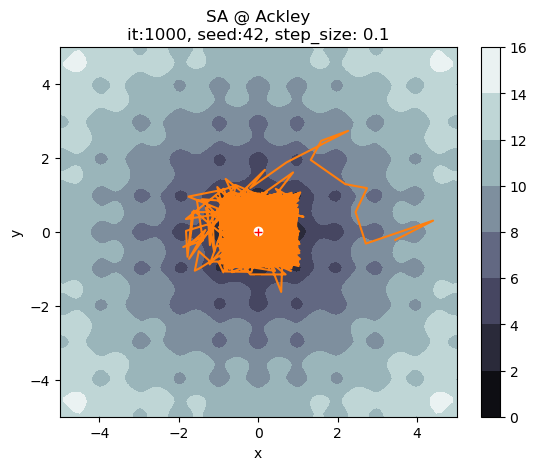

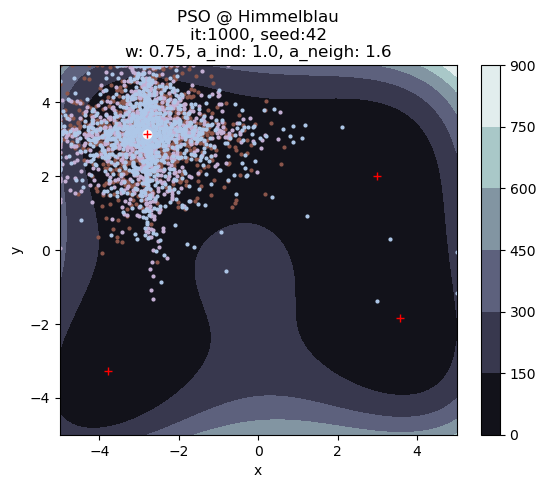

In [6]:
contour_plot(history_sa, tfunc_sa, title='')
contour_plot(history_pso, tfunc_pso, title='')

### Example: multiple plots

optimum - SA @ Ackley:

* found    : pos: [ 0.1691878  -0.06947249]
           : val: 1.2227891390635897

* expected : pos: [0. 0.]
           : val: 0.0

optimum - SA @ Himmelblau:

* found    : pos: [3.16519791 1.83381897]
           : val: 0.949108966513597

* expected : pos: [3. 2.] | [-2.805118  3.131312] | [-3.77931  -3.283186] | [ 3.584428 -1.848126]
           : val: 0.0

optimum - SA @ Beale:

* found    : pos: [3.38719655 0.57961562]
           : val: 0.01632032364986027

* expected : pos: [3.  0.5]
           : val: 0.0

optimum - SA @ Eggholder:

* found    : pos: [377.39908832 176.50893516]
           : val: -599.1185440011302

* expected : pos: [512.     404.2319]
           : val: -959.6407

optimum - SA @ Schaffner No2:

* found    : pos: [-14.66255927  10.08986831]
           : val: 0.21608246888124943

* expected : pos: [0. 0.]
           : val: 0.0

optimum - SA @ Schaffner No4:

* found    : pos: [ 16.69809455 -52.64622631]
           : val: 0.4874011860287457

* ex

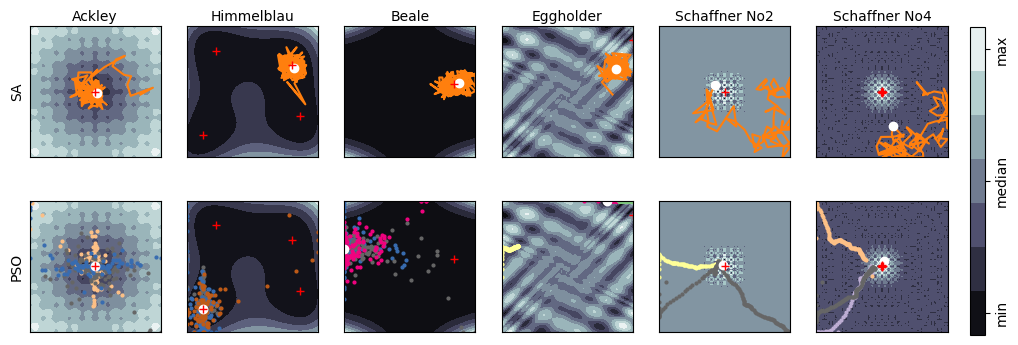

In [7]:
test_funcs = [
    sapso.test.Ackley(),
    sapso.test.Himmelblau(),
    sapso.test.Beale(),
    sapso.test.Eggholder(),
    sapso.test.SchaffnerNo2(),
    sapso.test.SchaffnerNo4(),
]

methods = [
    'SA',
    'PSO',
]

kwargs_sa = {
    'iterations'  : 100,
    'seed'        : 42,
    'temperature' : None,  # uses default cooling scheme
    'step_size'   : 0.1,   # steps of size step_size percentage of smallest length of hyper cube area
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

kwargs_pso = {
    'iterations'  : 100,
    'seed'        : 43,
    'n_particles' : 10, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

kwargs_method = [
    kwargs_sa,
    kwargs_pso,
]


kwargs_plot = {
    'resolution'   : 100,
    'cmap_bg'      : 'bone',     # cmap for background
    'cmap_fg'      : 'Accent',   # cmap for traces of PSO plots
    'title'        : None,       # don't set title
    #'title'        : '',        # automatically set title
    'title_length' : 'short',    # title ignored if title is ''
}

sapso.plot.comparison_plot(test_funcs, methods, kwargs_method, kwargs_plot)

In [8]:
# select 2D test function
tfunc_pso = Eggholder()

# default params
kwargs_pso = {
    'iterations'  : 100,
    'seed'        : 43,
    'n_particles' : 10, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate PSO manager class
PSO = ParticleSwarmOptimization(tfunc_pso.objective, tfunc_pso.area, **kwargs_pso)

# optimize by simulated annealing
history_pso = PSO.optimize()

# quickly print most important results
sapso.utils.print_results(history_pso, tfunc_pso)

optimum - PSO @ Eggholder:

* found    : pos: [313.96211449 512.        ]
           : val: -871.4843323099084

* expected : pos: [512.     404.2319]
           : val: -959.6407


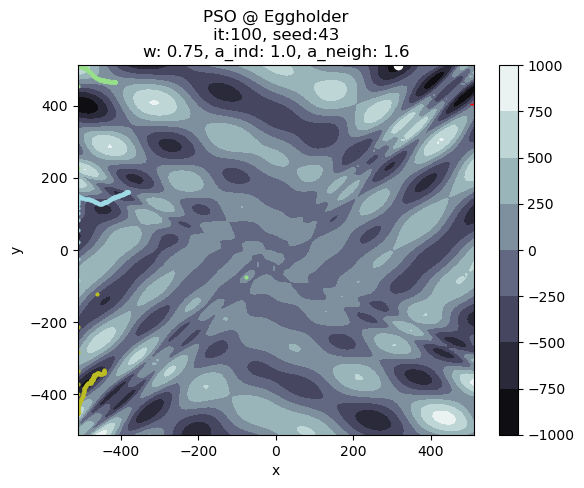

In [9]:
# plot results
contour_plot(history_pso, tfunc_pso, title='')